In [2]:
import pandas as pd
import seaborn as sns

fileName = 'synergy_logistics_database.csv'
# Crear el dataframe
synergyDF = pd.read_csv(fileName, index_col="register_id")
# DataFrame con las columnas a usar
nuevoDF_1 = synergyDF[["direction", "origin", "destination", "transport_mode", "total_value"]]
nuevoDF_2 = synergyDF[["direction", "origin", "destination", "year", "product", "transport_mode", "company_name", "total_value"]]

# Rutas de importación y exportación

In [3]:
agrupados = nuevoDF_1.groupby(["direction", "origin", "destination", "transport_mode"]).count()

# Ordenar de mayor a menor
agrupados = agrupados.rename(columns={'total_value': 'count'})
agrupados = agrupados.sort_values(by=['count'], ascending=False)

In [4]:
# Se filtra exportaciones e importaciones
agrupadosExp = agrupados.xs('Exports')
agrupadosImp = agrupados.xs('Imports')

# Se agrega nombre al DF
agrupadosExp['name'] = agrupadosExp.index.to_list()
agrupadosImp['name'] = agrupadosImp.index.to_list()
agrupados['name'] = agrupados.index.to_list()

In [7]:
# Cambio el nombre para mostrar el origen, destino y transporte
def cambio_nombre(text,n):
    nombre = f'{text[n]}/{text[n+1]}\n{text[n+2]}'
    return nombre

agrupadosExp['name'] = agrupadosExp['name'].apply(cambio_nombre,args=(0,))
agrupadosImp['name'] = agrupadosImp['name'].apply(cambio_nombre, args=(0,))
agrupados['name'] = agrupados['name'].apply(cambio_nombre, args=(1,))

In [10]:
# Función para cambiar el contenido de la columna
def medio_transp(text,n):
    return text[n]

In [ ]:
# Nueva columna, con el medio de transporte
agrupadosExp['medio'] = agrupadosExp.index.to_list()
agrupadosImp['medio'] = agrupadosImp.index.to_list()
agrupados['medio'] = agrupados.index.to_list()

# Aplicamos la transformación
agrupadosExp['medio'] = agrupadosExp['medio'].apply(medio_transp,args=(2,))
agrupadosImp['medio'] = agrupadosImp['medio'].apply(medio_transp,args=(2,))
agrupados['medio'] = agrupados['medio'].apply(medio_transp,args=(3,))

## Rutas más exploradas
Se muestra en la siguiente tabla las 10 rutas más exploradas

In [8]:
agrupados.head(10)

count  \
direction origin      destination transport_mode          
Exports   South Korea Vietnam     Sea               497   
          USA         Netherlands Sea               436   
          Netherlands Belgium     Road              374   
          China       Mexico      Air               330   
          Japan       Brazil      Sea               306   
          Germany     France      Road              299   
          South Korea Japan       Sea               279   
Imports   Singapore   Thailand    Sea               273   
Exports   Australia   Singapore   Sea               273   
          Canada      Mexico      Rail              261   

                                                                       name  
direction origin      destination transport_mode                             
Exports   South Korea Vietnam     Sea              South Korea/Vietnam\nSea  
          USA         Netherlands Sea                  USA/Netherlands\nSea  
          Netherlands Belgium     Road            Netherlands/Belgium\nRoad  
          China       Mexico      Air                     China/Mexico\nAir  
          Japan       Brazil      Sea                     Japan/Brazil\nSea  
          Germany     France      Road                 Germany/France\nRoad  
          South Korea Japan       Sea                South Korea/Japan\nSea  
Imports   Singapore   Thailand    Sea               Singapore/Thailand\nSea  
Exports   Australia   Singapore   Sea              Australia/Singapore\nSea  
          Canada      Mexico      Rail                  Canada/Mexico\nRail

<AxesSubplot:xlabel='name', ylabel='count'>

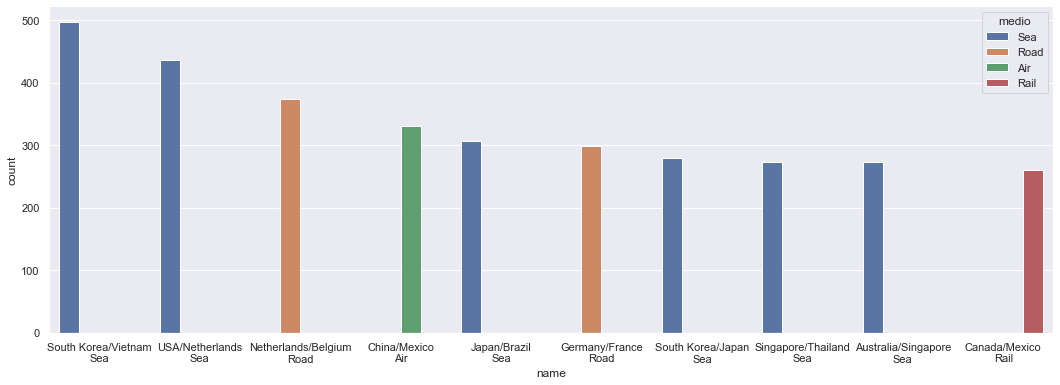

In [19]:
# Graficamos para rutas más exploradas
sns.set(rc={"figure.figsize": (18, 6)}) 
sns.barplot(data=agrupados.head(10), x='name', y='count', hue='medio')

## Rutas más exploradas por exportación
En la Tabla 2 se muestra las rutas más exploradas en exportación y posteriormente una gráfica

In [9]:
agrupadosExp.head(10)

,,,count,name
origin,destination,transport_mode,,
Singapore,Thailand,Sea,273,Singapore/Thailand\nSea
Germany,China,Sea,233,Germany/China\nSea
China,Japan,Air,210,China/Japan\nAir
Japan,Mexico,Sea,206,Japan/Mexico\nSea
Malaysia,Thailand,Rail,195,Malaysia/Thailand\nRail
China,Thailand,Road,145,China/Thailand\nRoad
Spain,Germany,Road,142,Spain/Germany\nRoad
China,United Arab Emirates,Sea,114,China/United Arab Emirates\nSea
Brazil,China,Sea,113,Brazil/China\nSea


<AxesSubplot:xlabel='name', ylabel='count'>

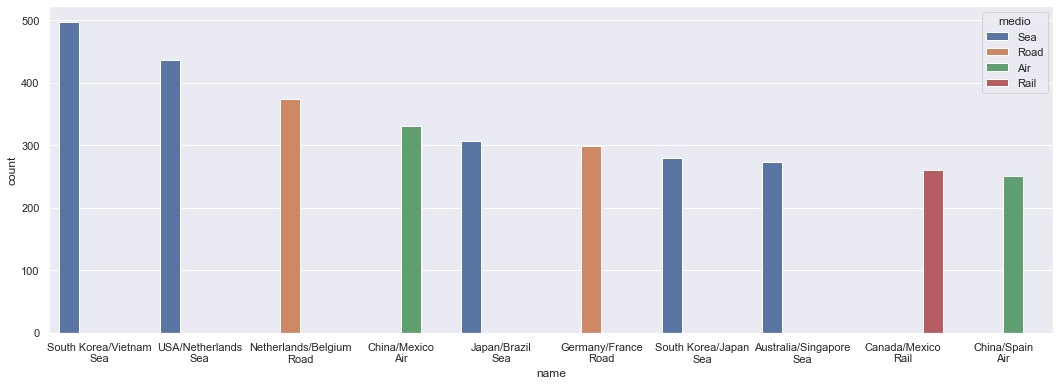

In [11]:
# Graficamos para Exportación
sns.set(rc={"figure.figsize": (18, 6)})  
sns.barplot(data=agrupadosExp.head(10), x='name', y='count', hue='medio')

## Rutas más exploradas por importación
En la Tabla 3 se muestra las rutas más exploradas por importación y posteriormente una gráfica de estas indicando su medio de transporte por un esquema de colores.

In [14]:
agrupadosImp.head(10)

,,,count,name,medio
origin,destination,transport_mode,,,
Singapore,Thailand,Sea,273,Singapore/Thailand\nSea,Sea
Germany,China,Sea,233,Germany/China\nSea,Sea
China,Japan,Air,210,China/Japan\nAir,Air
Japan,Mexico,Sea,206,Japan/Mexico\nSea,Sea
Malaysia,Thailand,Rail,195,Malaysia/Thailand\nRail,Rail
China,Thailand,Road,145,China/Thailand\nRoad,Road
Spain,Germany,Road,142,Spain/Germany\nRoad,Road
China,United Arab Emirates,Sea,114,China/United Arab Emirates\nSea,Sea
Brazil,China,Sea,113,Brazil/China\nSea,Sea


<AxesSubplot:xlabel='name', ylabel='count'>

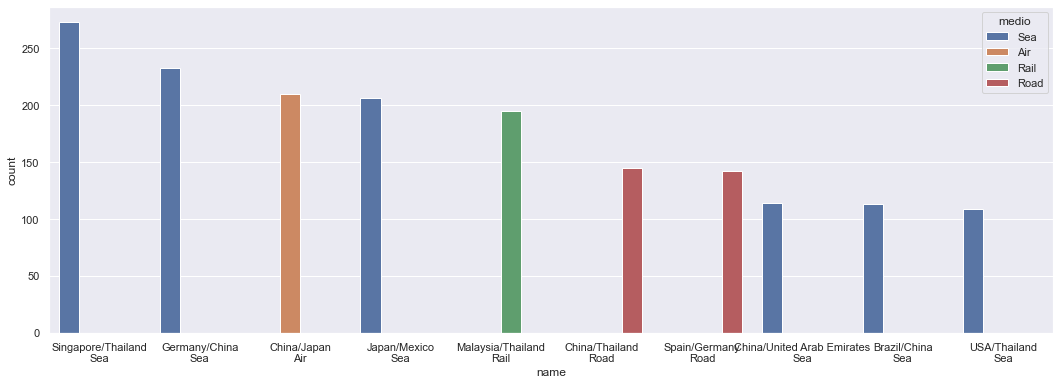

In [15]:
# Graficamos para Importación
sns.set(rc={"figure.figsize": (18, 6)})  
sns.barplot(data=agrupadosImp.head(10), x='name', y='count', hue='medio')

# Medio de transporte más usado

In [65]:
medio_transporte = nuevoDF_1.groupby(['direction','transport_mode']).count()

medio_transporte = medio_transporte.rename(columns={'total_value': 'count'})
medio_transporte = medio_transporte.sort_values(by=['count'], ascending=False)

In [66]:
# Se filtra exportaciones e importaciones
medio_transporteExp = medio_transporte.xs('Exports')
medio_transporteImp = medio_transporte.xs('Imports')

## Transporte para exportación

In [67]:
medio_transporteExp

,origin,destination,count
transport_mode,,,
Sea,8434,8434,8434
Rail,2780,2780,2780
Road,2149,2149,2149
Air,2045,2045,2045


<AxesSubplot:xlabel='transport_mode', ylabel='count'>

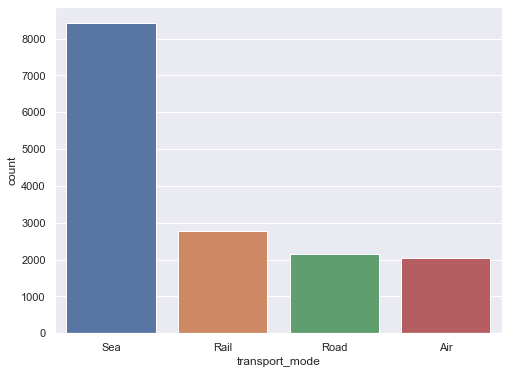

In [69]:
sns.set(rc={"figure.figsize": (8, 6)})  #width=8, height=4
sns.barplot(data=medio_transporteExp, y='count', x=medio_transporteExp.index)

## Transporte para importación

In [71]:
medio_transporteImp

,origin,destination,count
transport_mode,,,
Sea,2254,2254,2254
Rail,601,601,601
Road,449,449,449
Air,344,344,344


<AxesSubplot:xlabel='transport_mode', ylabel='count'>

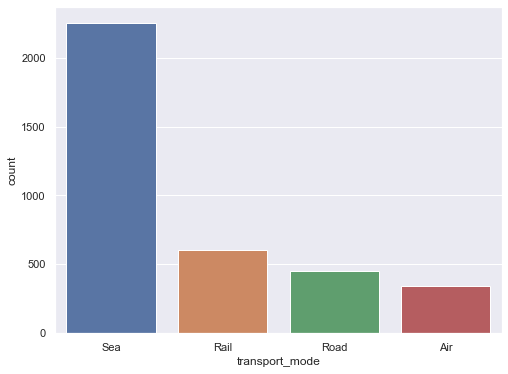

In [73]:
sns.set(rc={"figure.figsize": (8, 6)})  #width=8, height=4
sns.barplot(data=medio_transporteImp, y='count', x=medio_transporteImp.index)

# Valor total de importaciones y exportaciones

In [79]:
# Agrupamos por `direction`
paisValor_exp = synergyDF.groupby(['direction','origin']).sum()
paisValor_exp = paisValor.sort_values(by=['total_value'], ascending=False)

paisValor_imp = synergyDF.groupby(['direction','destination']).sum()
paisValor_imp = paisValor.sort_values(by=['total_value'], ascending=False)

# Separamos en dos df
expPaisValor = paisValor_exp.xs('Exports')
impPaisValor = paisValor_imp.xs('Imports')

In [80]:
expPaisValor['porcentaje_acumulado'] = 100 * (expPaisValor.total_value.cumsum() / expPaisValor.total_value.sum())

top_80_exp = expPaisValor[expPaisValor["porcentaje_acumulado"] < 80]
top_80_exp

<ipython-input-80-d0fc935600f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expPaisValor['porcentaje_acumulado'] = 100 * (expPaisValor.total_value.cumsum() / expPaisValor.total_value.sum())


,year,total_value,porcentaje_acumulado
origin,,,
China,3343248,32977046000,20.589640
France,1854137,18614332000,32.211736
USA,2953071,18355306000,43.672105
South Korea,2287853,14621146000,52.801004
Russia,1545745,13223000000,61.056953
Japan,2535907,11948976000,68.517449
Germany,2612813,11343233000,75.599741


<AxesSubplot:xlabel='origin', ylabel='porcentaje_acumulado'>

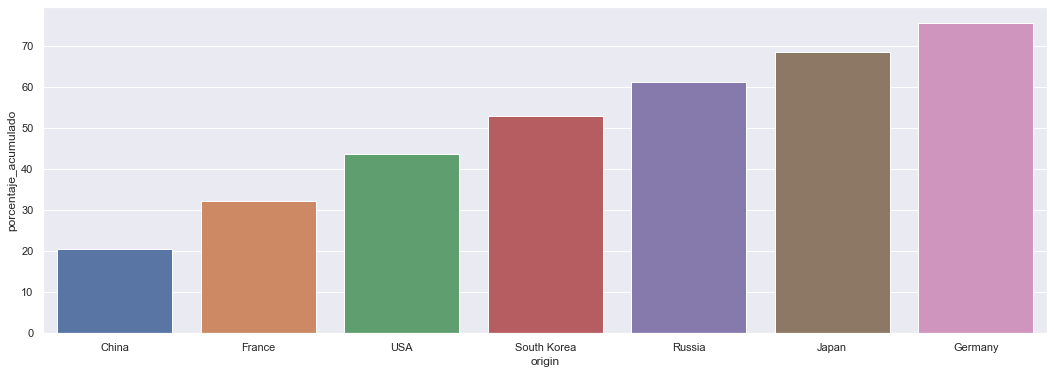

In [81]:
sns.set(rc={"figure.figsize": (18, 6)})  #width=8, height=4
sns.barplot(data=top_80_exp, y='porcentaje_acumulado',x=top_80_exp.index)

In [85]:
impPaisValor['porcentaje_acumulado'] = 100 * (impPaisValor.total_value.cumsum() / impPaisValor.total_value.sum())

top_80_imp = impPaisValor[impPaisValor['porcentaje_acumulado'] < 80]
top_80_imp

<ipython-input-85-ac9d5000e37d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impPaisValor['porcentaje_acumulado'] = 100 * (impPaisValor.total_value.cumsum() / impPaisValor.total_value.sum())


,year,total_value,porcentaje_acumulado
origin,,,
China,1240848,12233000000,22.030327
Japan,897766,8094000000,36.606757
USA,758592,5291000000,46.135283
Mexico,738306,4621000000,54.457211
Germany,744786,4250000000,62.111007
Singapore,550813,4017000000,69.345195
South Korea,324757,3889000000,76.348869


<AxesSubplot:xlabel='origin', ylabel='porcentaje_acumulado'>

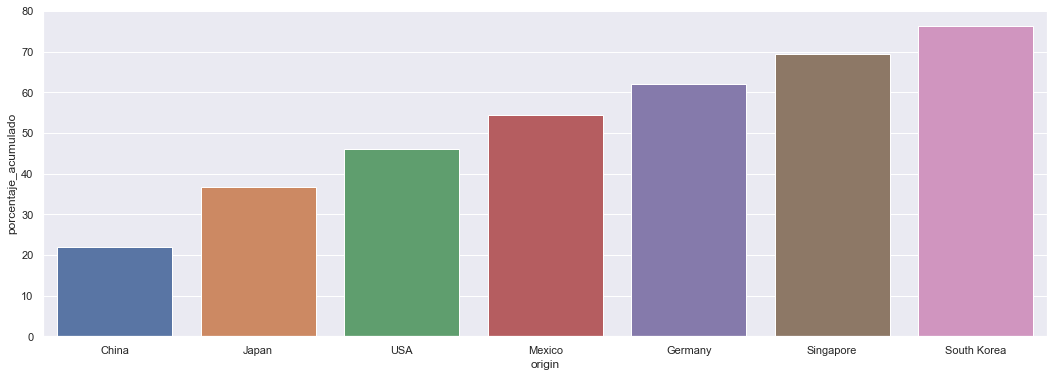

In [86]:
sns.set(rc={"figure.figsize": (18, 6)})  #width=8, height=4
sns.barplot(data=top_80_imp, y='porcentaje_acumulado',x=top_80_imp.index)